# Libraries

In [1]:
import sys
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Versions

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

# K-means

In [4]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_circle)
labels = np.zeros_like(clusters)
for i in range(2):
    cat = (clusters == i)
    labels[cat] = mode(y_circle[cat])[0]
acc = accuracy_score(y_circle, labels)
print('Accuracy = ', acc)

Accuracy =  0.511


C:\Users\eapit\AppData\Local\Temp\ipykernel_167604\3218525653.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_circle[cat])[0]


Text(0, 0.5, 'X2')

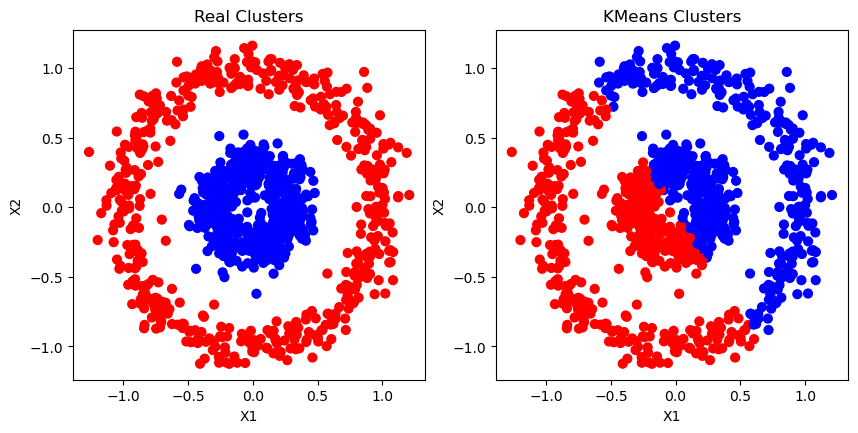

In [5]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[y_circle], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

Accuracy using GMM =  0.513


C:\Users\eapit\AppData\Local\Temp\ipykernel_167604\2443934426.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_circle[cat])[0]


Text(0, 0.5, 'X2')

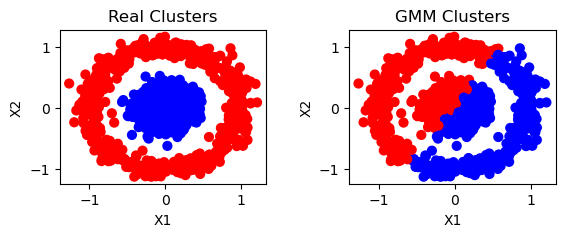

In [6]:
x_circle_col=circle_csv
x_circle_col = x_circle_col.drop('label', axis=1)
scaler = preprocessing.StandardScaler()
scaler.fit(X_circle)
scaled_X = scaler.transform(X_circle)

xs = pd.DataFrame(scaled_X, columns = x_circle_col.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(2):
    cat = (gmm_y == i)
    labels[cat] = mode(y_circle[cat])[0]

acc = accuracy_score(y_circle, labels)
print("Accuracy using GMM = ", acc)

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[y_circle], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot GMM Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(x_circle_col.x1, x_circle_col.x2, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(xs)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['X1', 'X2']

X_principal.head(2)

,X1,X2
0,0.918606,0.407874
1,0.761584,0.656716


In [8]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

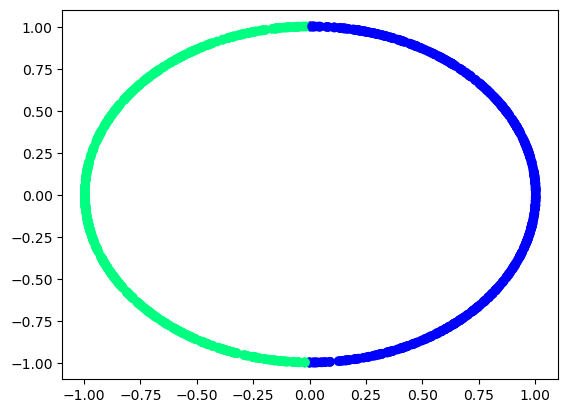

In [9]:
plt.scatter(X_principal['X1'], X_principal['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter)
plt.show()

In [10]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(X_principal)

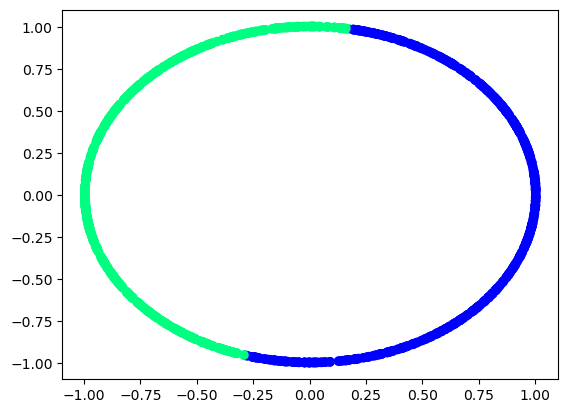

In [11]:
plt.scatter(X_principal['X1'], X_principal['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter)
plt.show()

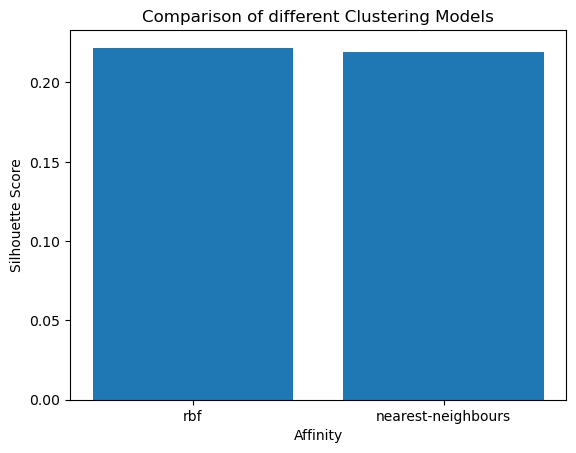

[0.22192640178108983, 0.21909710336380936]


In [12]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(circle_csv, labels_rbf))
s_scores.append(silhouette_score(circle_csv, labels_nn))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)